In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris = load_iris()

In [4]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target

In [6]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
data=data[['sepal length (cm)','sepal width (cm)','class']]

In [8]:
data

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


In [9]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [10]:
y_train, y_test = data_train['class'], data_test['class']
del data_train['class']
del data_test['class']

In [11]:
data_train

,sepal length (cm),sepal width (cm)
62,6.0,2.2
68,6.2,2.2
85,6.0,3.4
113,5.7,2.5
120,6.9,3.2
...,...,...
61,5.9,3.0
36,5.5,3.5
101,5.8,2.7
15,5.7,4.4


In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [13]:
lda = LinearDiscriminantAnalysis()

In [14]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis()

In [15]:
lda.predict(data_test)

array([1, 0, 1, 2, 0, 2, 0, 2, 0, 0, 0, 1, 0, 2, 0, 2, 1, 2, 0, 1, 1, 2,
       1, 0, 0, 2, 0, 0, 2, 1])

In [20]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [18]:
print(result)

    0  1
0   2  1
1   0  0
2   1  1
3   1  2
4   0  0
5   2  2
6   0  0
7   2  2
8   0  0
9   0  0
10  0  0
11  1  1
12  0  0
13  1  2
14  0  0
15  2  2
16  1  1
17  1  2
18  0  0
19  1  1
20  2  1
21  2  2
22  1  1
23  0  0
24  0  0
25  2  2
26  0  0
27  0  0
28  2  2
29  1  1


In [19]:
lda.coef_

array([[-5.87284259,  7.99620949],
       [ 1.35178739, -3.28512523],
       [ 3.85409269, -3.83737183]])

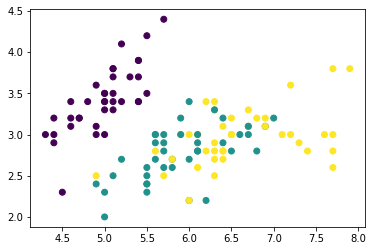

In [21]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.show()

In [23]:
small_train = data_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = data_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

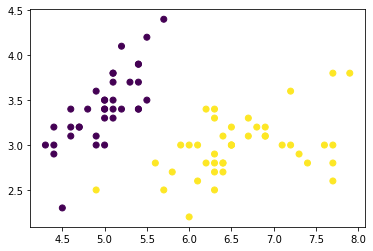

In [24]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [25]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [26]:
LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

LinearDiscriminantAnalysis()

In [27]:
lda_small.means_

array([[4.99189189, 3.42702703],
       [6.60238095, 2.97619048]])

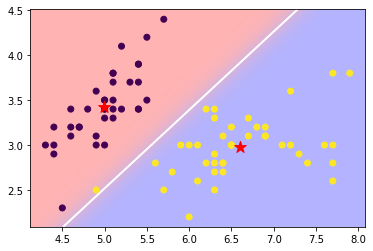

In [28]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [29]:
from sklearn.cluster import KMeans

In [52]:
data1 = data[['sepal length (cm)','sepal width (cm)']]

In [37]:
data1

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


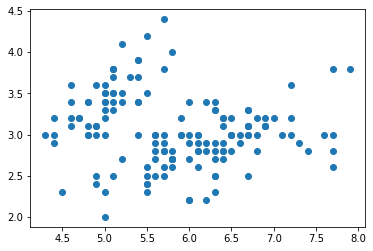

In [56]:
plt.scatter(data1['sepal length (cm)'], data1['sepal width (cm)'])

In [39]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [58]:
X_scaled = scaler.fit_transform(data1)

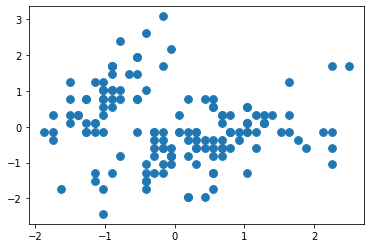

In [64]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [63]:
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

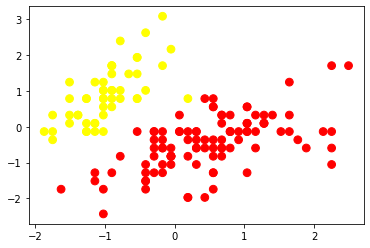

In [65]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [66]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

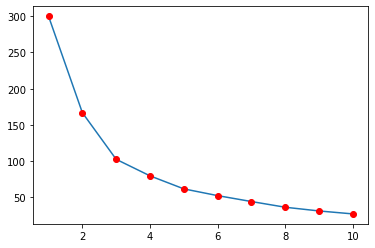

In [67]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [ ]:
# оптимальным выглядит 3-4 кластера


In [68]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

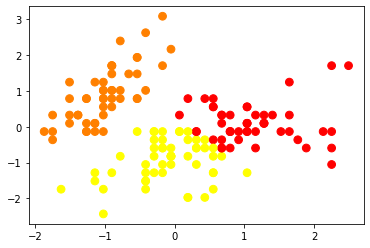

In [74]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [75]:
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 3, 3, 3, 1, 3, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       3, 1, 3, 1, 3, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 0, 0, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

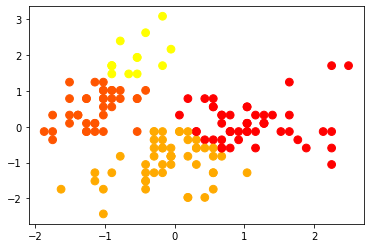

In [76]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)